In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Use inspect to find table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Find last date in dataset
last_date = session.query(func.max(func.strftime("%Y-%m-%d", measurement.date))).limit(5).all()
last_date

[('2017-08-23')]

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame
prcp_df = pd.DataFrame(prcp_data, columns = ['date', 'prcp'])
#Change date format to datetime
prcp_df['date'] = pd.to_datetime(prcp_df['date'], format='%Y/%m/%d')
#Set index to date column
prcp_df.set_index(prcp_df['date'])
#Display DF
prcp_df.head(10)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


<function matplotlib.pyplot.show(*args, **kw)>

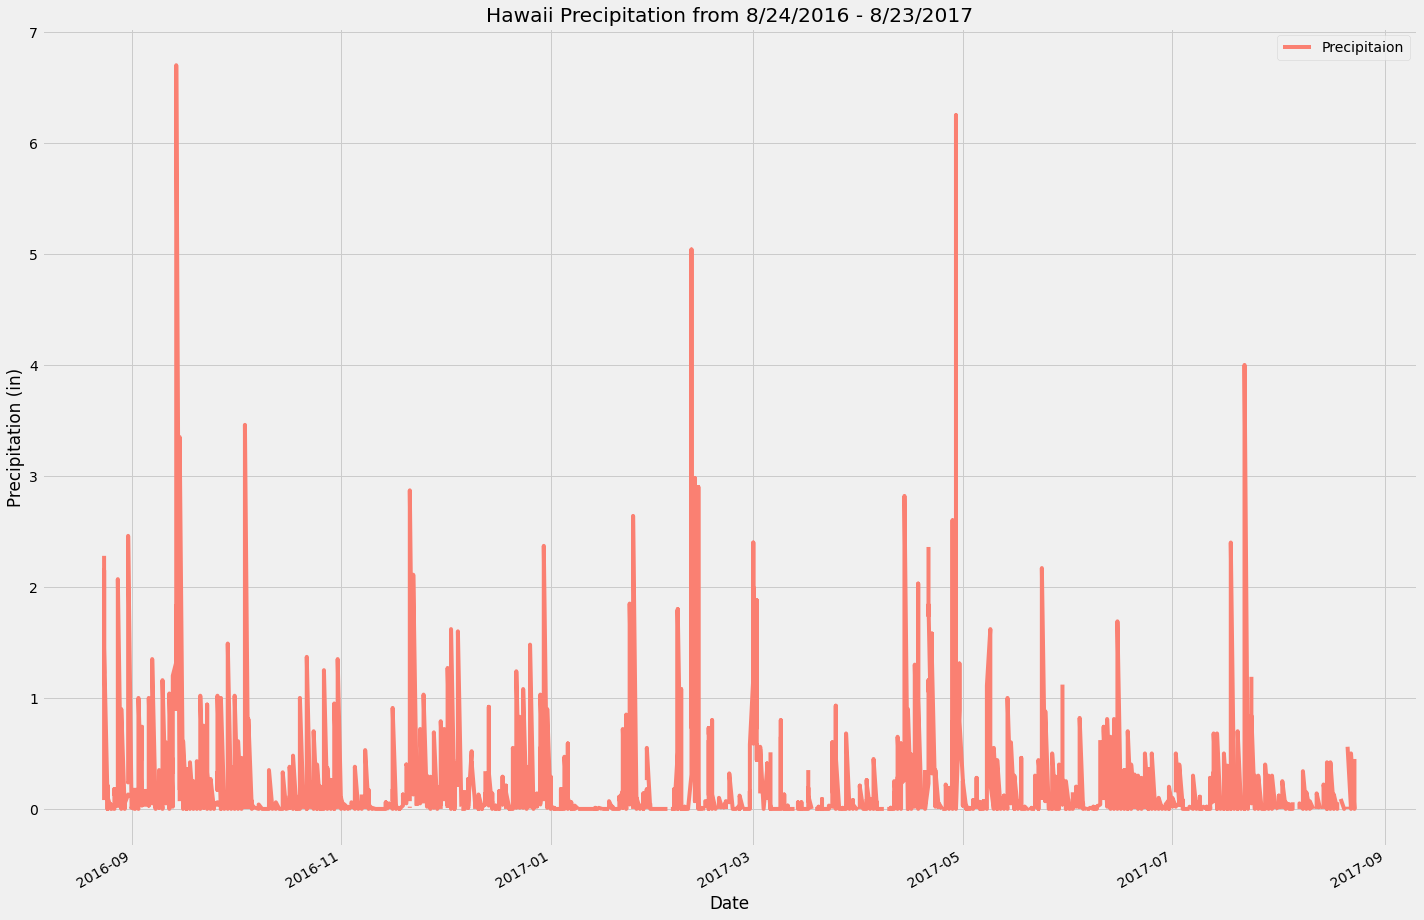

In [62]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('date','prcp', figsize = (20,13), color = 'salmon')
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.title("Hawaii Precipitation from 8/24/2016 - 8/23/2017")
plt.legend(["Precipitaion"])
plt.savefig("Images/Hawaii_Precipitation.png")
plt.tight_layout()
plt.show

In [60]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station.id).distinct().count()
station_count

9

In [52]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_list = (session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all())
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
max_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

print(f'The lowest temperature recorded is {min_temp}.')
print(f'The highest temperature recorded is {max_temp}.')
print(f'The average temperature recorded is {avg_temp}.')

The lowest temperature recorded is [(54.0,)].
The highest temperature recorded is [(85.0,)].
The average temperature recorded is [(71.66378066378067,)].


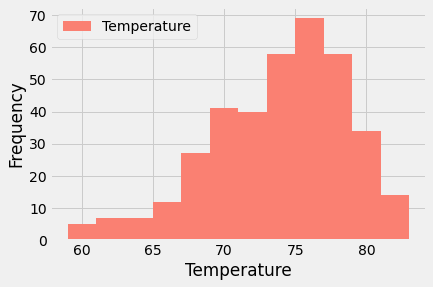

In [58]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_query = session.query(measurement.date,measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter (func.strftime("%Y-%m-%d", measurement.date) >= dt.date(2016,8,3)).all()

top_station_query_df = pd.DataFrame(top_station_query, columns = ['Date', 'Temperature'])

fig, ax = plt.subplots()
top_station_query_df.plot.hist(bins = 12, ax = ax, color = 'salmon')

ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

plt.savefig("Images/Histogram.png")

plt.tight_layout
plt.show()